#1. Mount Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -al '/gdrive/My Drive/darknet'

total 36
drwx------ 2 root root 4096 Apr 19  2020 backup
drwx------ 2 root root 4096 Apr 18  2020 bin
drwx------ 2 root root 4096 Apr 20  2020 cfg
drwx------ 2 root root 4096 Apr 18  2020 cuDNN
drwx------ 2 root root 4096 Apr 19  2020 custom
drwx------ 2 root root 4096 Apr 20  2020 data
drwx------ 2 root root 4096 Dec 23 03:58 food100
drwx------ 2 root root 4096 Apr 19  2020 images
drwx------ 2 root root 4096 Apr 19  2020 weights


In [3]:
weight_file = '/gdrive/My Drive/darknet/weights/yolov3.weights'
cfg_file = '/gdrive/My Drive/darknet/cfg/yolov3.cfg'
name_file = '/gdrive/My Drive/darknet/data/coco.names'

#2. Load File

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [5]:
min_confidence = 0.5

In [6]:
# Load Yolo
net = cv2.dnn.readNet(weight_file, cfg_file)

In [8]:
classes = []
with open(name_file, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
from google.colab import files
files.upload()

Saving car1.jpg to car1.jpg


{'car1.jpg': b'\xff\xd8\xff\xfe\x00\x10Lavc56.60.100\x00\xff\xdb\x00C\x00\x08\x10\x10\x13\x10\x13\x16\x16\x16\x16\x16\x16\x1a\x18\x1a\x1b\x1b\x1b\x1a\x1a\x1a\x1a\x1b\x1b\x1b\x1d\x1d\x1d"""\x1d\x1d\x1d\x1b\x1b\x1d\x1d  ""%&%##"#&&(((00..88:EES\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x01\x00\x03\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7

0 2 car
2 2 car
3 2 car
5 2 car


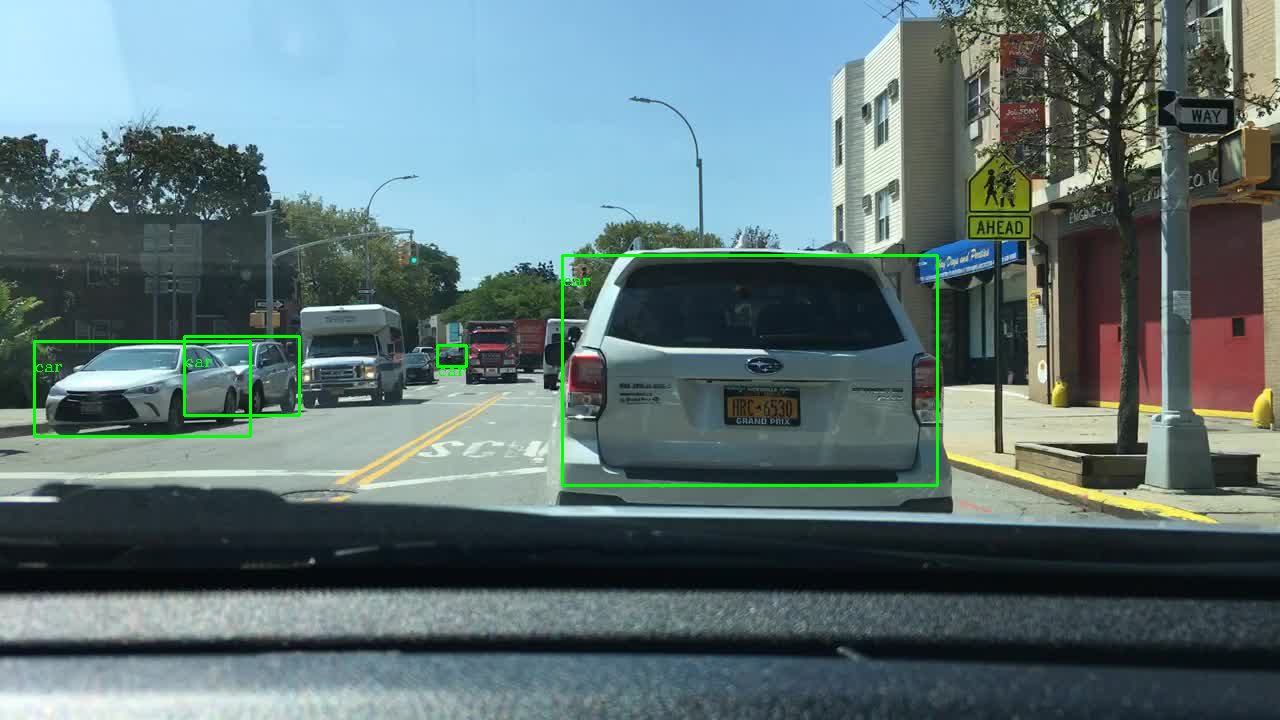

In [17]:
img = cv2.imread('car1.jpg')
height, width, channels = img.shape

# Detecting objects
# https://docs.opencv.org/master/d6/d0f/group__dnn.html
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
for i in range(len(boxes)):
    if i in indexes:
        if class_ids[i] == 2:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            print(i, class_ids[i], label)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img, label, (x, y + 30), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1)  

cv2_imshow(img)      

#3. Plate

In [25]:
# 'haarcascade_russian_plate_number.xml'
from google.colab import files
files.upload()

Saving russiacar.jpg to russiacar.jpg


{'russiacar.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x01\x8b\x02\x80\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x01\x02\x03\x05\x06\x00\x07\x08\xff\xc4\x00V\x10\x00\x02\x01\x03\x02\x03\x05\x04\x06\x07\x05\x02\x0b\x06\x05\x05\x01\x02\x03\x00\x04\x11\x05!\x06\x121\x13"AQa\x07q\x81\x91\x142B\xa1\xb1\xc1\x15#3Rr\x82\xd1$Cb\x92\xe1\x084\x16\x17%DScs\x83\xa2\xd2\xf0&5T\x93\xb2\xf1\x18dt\xc2\xe26EVe\x84\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x00,\x11\x00\x02\x02\x02\

In [26]:
!ls -al

total 228
drwxr-xr-x 1 root root  4096 Mar 11 02:51 .
drwxr-xr-x 1 root root  4096 Mar 11 02:33 ..
-rw-r--r-- 1 root root 77963 Mar 11 02:35 car1.jpg
drwxr-xr-x 4 root root  4096 Mar  5 14:36 .config
-rw-r--r-- 1 root root 75482 Mar 11 02:43 haarcascade_russian_plate_number.xml
-rw-r--r-- 1 root root 55947 Mar 11 02:51 russiacar.jpg
drwxr-xr-x 1 root root  4096 Mar  5 14:37 sample_data


In [20]:
plate_cascade_name = 'haarcascade_russian_plate_number.xml'

In [21]:
plate_cascade = cv2.CascadeClassifier()
#-- 1. Load the cascades
if not plate_cascade.load(cv2.samples.findFile(plate_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)   

0 2 car


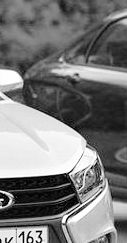

()
1 2 car


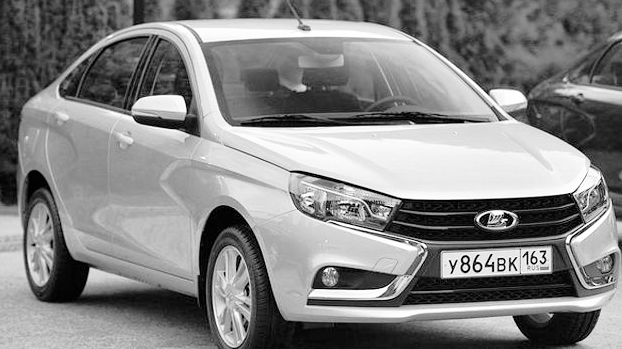

[[418 236 149  50]]


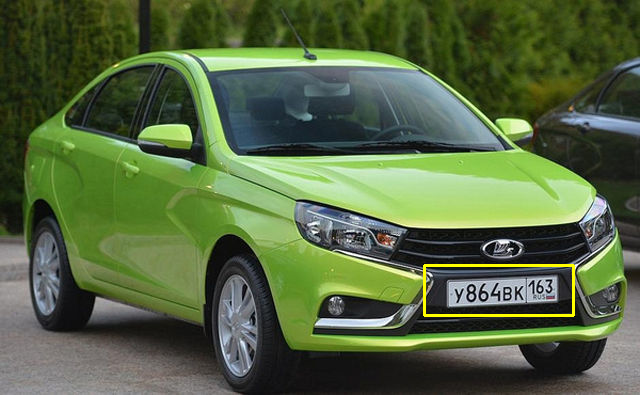

In [30]:
img = cv2.imread('russiacar.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

height, width, channels = img.shape

# Detecting objects
# https://docs.opencv.org/master/d6/d0f/group__dnn.html
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > min_confidence:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, min_confidence, 0.4)
for i in range(len(boxes)):
    if i in indexes:
        if class_ids[i] == 2:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            print(i, class_ids[i], label)
            #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            #cv2.putText(img, label, (x, y + 30), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1)  
            carROI = gray[y:y+h, x:x+w]
            cv2_imshow(carROI)
            plates = plate_cascade.detectMultiScale(carROI)
            print(plates)
            for (x2, y2, w2, h2) in plates:
                cv2.rectangle(img, (x+x2, y+y2), (x+x2 + w2, y+y2 + h2), (0, 255, 255), 2)

cv2_imshow(img)      